# The Big Bang

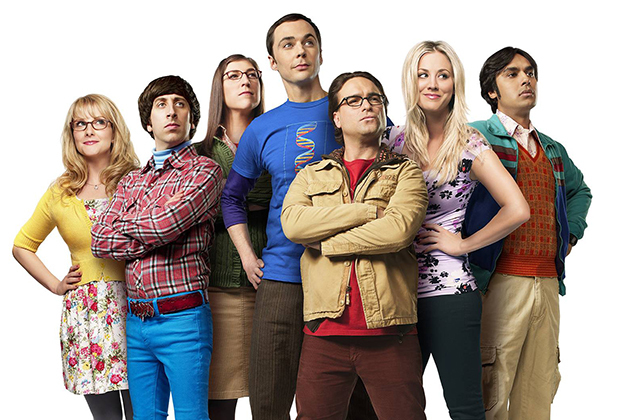

### In this exercise you will implement a text search engine.
* You can use one  store object with any data structure that suits your idea.
* The tests are divided into steps, please pass each step at a time, but keep previous steps working.
* Try to complete as many steps as you can but keep in mind the complexity and quality of your solution.


### Few tips before you go - 
* We suggest you to read all tests and assert messages before you start implementing, it will save you some time in the advanced steps.
* Feel free to install and import any external package that might help you, but make sure that the implementation of the DB is yours (and not imported from the external package). To install an external package simply run `!pip install <package_name>` inside the notebook.

In [ ]:
from typing import List

In [ ]:
def _generate_data(db):
    for i, row in enumerate(open("./transcript.txt", 'r').readlines()):
        if row.strip():
            index(db, row.strip(), id_=i)

## Your Code

In [ ]:
# Change this line to point to your DB object
db = None

In [ ]:
def index(db, text: str, id_: int):
    """
    Stores the document and have it available to search.

    :param db: The data structure to use.
    :param text: The text to index to the DB. 
    :param id_: The ID for the given doc.
    """
    raise NotImplemented("Implement Me!")

In [ ]:
def match(db, text: str) -> List[int]:
    """
    Returns the IDs of documents that contained ANY of the words in this text.
    This operation is case-insensitive.

    :param db: The data structure to use.
    :param text: text that we want to search for.
    :return: The list of matching document IDs.
    """
    raise NotImplemented("Implement Me!")

## Sanity Tests

In [ ]:
index(db, "Our whole universe was in a hot, dense state", id_=1)

assert match(db, "universe") == [1], "The word 'universe' should appear in the DB"

In [ ]:
index(db, "Then nearly fourteen billion expansion ago expansion started, wait!", id_=1)

assert match(db, "It all started with the big bang!") == [1], "The word 'started' should appear in the DB"
assert match(db, "AGO") == [1], "The word 'ago' should appear in the DB"

In [ ]:
index(db, "Our best and brightest figure that it'll make an even bigger bang!", id_=1)
index(db, "Music and mythology, Einstein and astrology. It all started with the big bang!", id_=2)

assert match(db, "BANG") == [1, 2], 'The word "bang" should appear in the DB multiple times'

In [ ]:
index(db, "It's expanding ever outward but one day", id_=1)
assert match(db, "expanding") == [1], 'Document with id = 1 contains the word "expanding"'

index(db, "Our best and brightest figure that it'll make an even bigger bang!", id_=1)
assert match(db, "expanding") == [], "Document with id = 1 was overridden by a new doc that does not contain the word expanding"
assert match(db, "brightest") == [1], "Document with id = 1 contains the word 'brightest'"

In [ ]:
index(db, "It doesn't need proving", id_=1)

assert match(db, "prove") == [1], "Our search should support variations match, so in this case it should find all documents containing - proving, prove, proves, proved.."

In [ ]:
_generate_data(db)
        
assert len(match(db, "jedi")) >= 70, "expected more appearances of the word 'jedi'"

## Performance Tests

In [ ]:
import time

class Timer:
    def __init__(self):
        self.start = None
        self.end = None
        self.duration = None
        
    def __enter__(self):
        self.start = time.time()
        
    def __exit__(self, type, value, traceback):
        self.end = time.time()
        self.duration = self.end - self.start

In [ ]:
_generate_data(db)

In [ ]:
t = Timer()
with t:
    match(db, "jedi")

assert t.duration < 0.0001, "Too slow :("